# Bank Customer Churn Prediction

In this project, we used supervised learning models to predict which customers are likely to churn in the future. Furthermore, we analyzed top factors that influenced user retention. [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Selection](#Part-4:-Feature-Selection)

# Part 0: Setup Google Drive Environment
check this [link](https://colab.research.google.com/notebooks/io.ipynb) for more info

In [ ]:
# install pydrive to load data -> however, may not support big datasets
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=18vTBISX1fhrtpcEeELPBv6QlSPTtH6ZJ'
_, id = link.split('=')
file = drive.CreateFile({'id':id})
file.GetContentFile('bank_churn.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Another way to load data
import pandas as pd
file_id='17nbs4OBtrj7kq40Lf9laopynyp4LJDGn'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
my_data = pd.read_csv(csv_url)
my_data.head()

# Part 1: Data Exploration

### Part 1.1: Understand the data

In [ ]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv('bank_churn.csv')

In [ ]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print ("Num of rows: " + str(churn_df.shape[0]))    # row count
print ("Num of columns: " + str(churn_df.shape[1])) # col count

Num of rows: 10000
Num of columns: 14


In [ ]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Get target variable
y = churn_df['Exited']

In [ ]:
# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[20.37]


### Part 1.2:  Understand the features

In [ ]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

Comments
* Customers with higher age may be more likely to churn
*

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

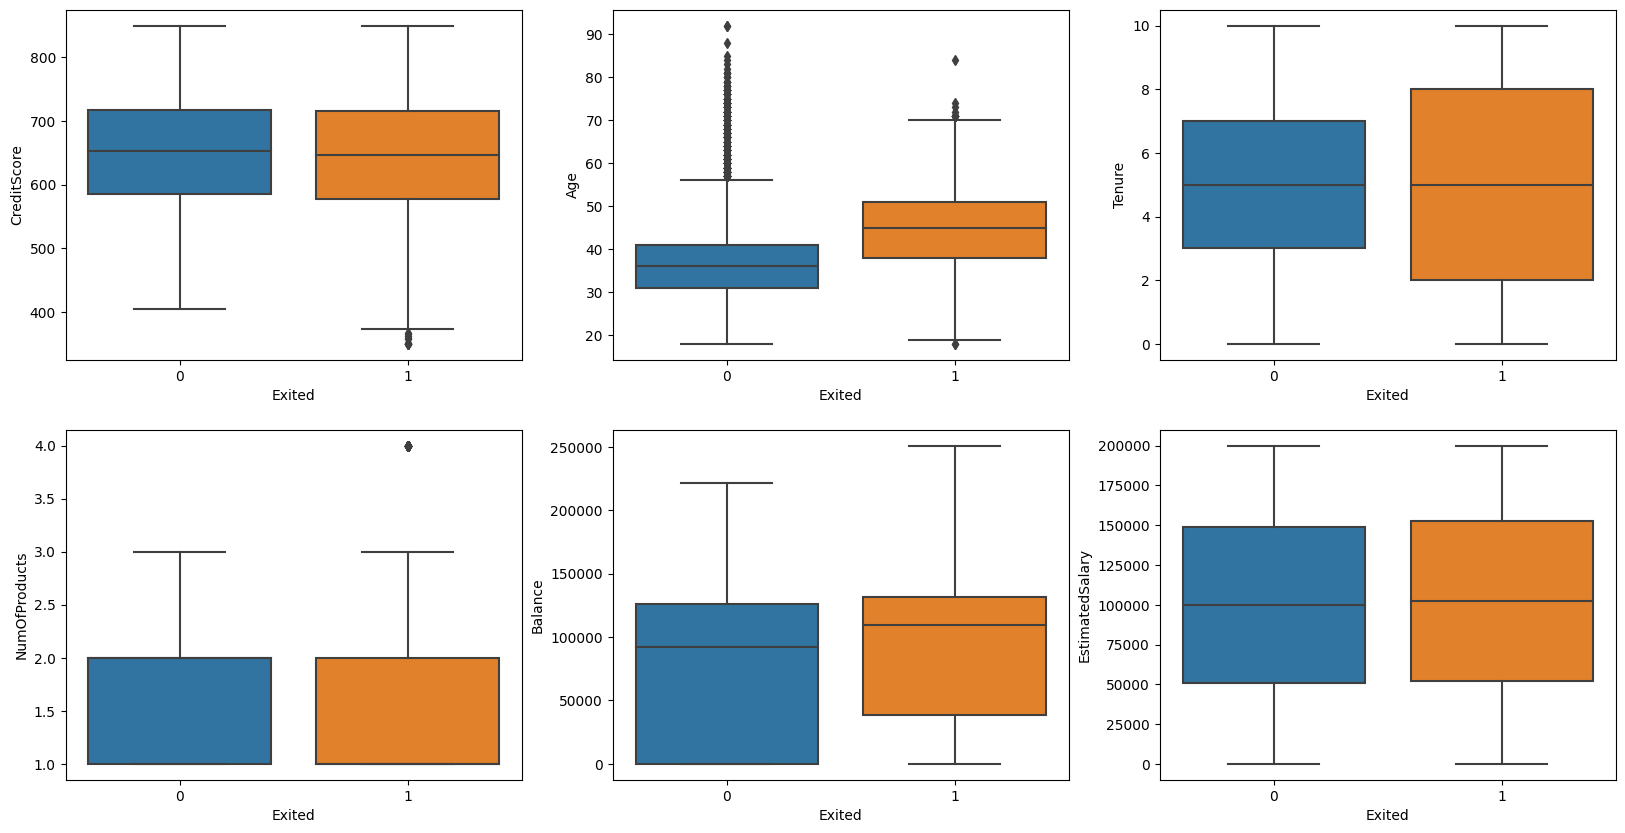

In [ ]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

<Axes: xlabel='Exited', ylabel='count'>

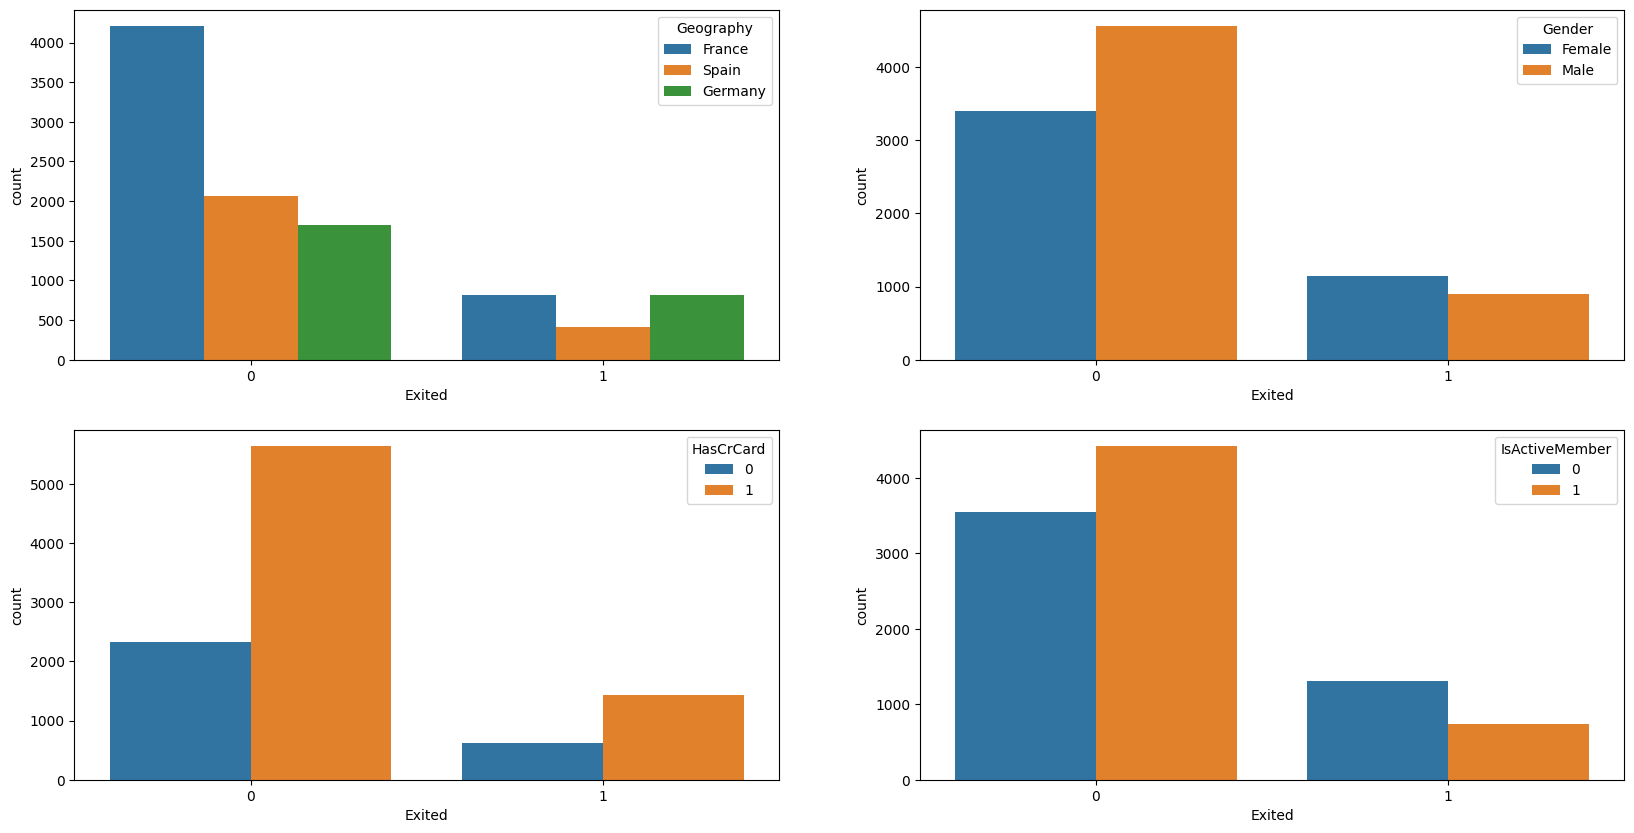

In [ ]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

<Axes: >

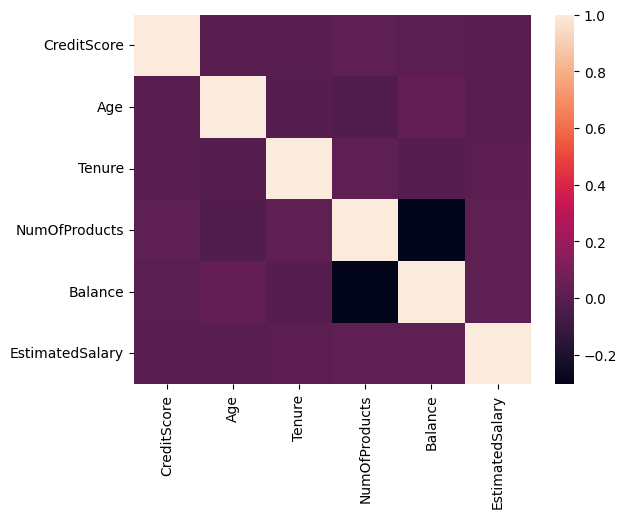

In [ ]:
# correlations between features
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

In [ ]:
# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


# Part 2: Feature Preprocessing

feature encoding, feature scaling

Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](https://contrib.scikit-learn.org/categorical-encoding/#category-encoders).

In [ ]:
# ordinal encoding
churn_df['Gender'] = churn_df['Gender'] == 'Female'
# Converting the values in the "Gender" column from 'Female' and 'Male' to Boolean values (True and False)
churn_df
# true/false automatically converted to 1/0 in python

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,True,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,True,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,True,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,True,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,True,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,False,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,False,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,True,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,False,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# one hot encoding
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=False)
# drop first because 3 values only need 2 variables

In [ ]:
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,True,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,True,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,True,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,True,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,True,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,6,15574012,Chu,645,False,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,7,15592531,Bartlett,822,False,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,8,15656148,Obinna,376,True,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,9,15792365,He,501,False,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,10,15592389,H?,684,False,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [ ]:
# Get feature space by dropping useless feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1


# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [ ]:
# Split data into training and testing
from sklearn import model_selection

# Reserve 25% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y)
# Stratify option will distributed data based on values of y, to avoid cases of all 0s going into testing data

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 12 features
test data has 2500 observation with 12 features


In [ ]:
# Scale the data, using standardization
# M1 standardization (x-mean)/std -> can always use this method
# M2 normalization (x-x_min)/(x_max-x_min) -> [0,1] -> use this method when require values to be [0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirements

# for example, use training data to train the standardscaler to get mean and std
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1)=0,(2-1)/(6-1)=1/5..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.24116862, -0.91629031, -1.42962979, ..., -1.00561577,
         1.74071576, -0.57591331],
       [-1.88839148,  1.09135717, -1.62087097, ...,  0.99441559,
        -0.57447633, -0.57591331],
       [-0.09613013,  1.09135717,  1.1521261 , ..., -1.00561577,
         1.74071576, -0.57591331],
       ...,
       [-1.82623213, -0.91629031,  1.43898786, ...,  0.99441559,
        -0.57447633, -0.57591331],
       [-0.23080873,  1.09135717,  1.1521261 , ..., -1.00561577,
         1.74071576, -0.57591331],
       [-1.89875138, -0.91629031,  1.72584963, ...,  0.99441559,
        -0.57447633, -0.57591331]])

### Part 3.2: Model Training and Selection

In [ ]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.7912

In [ ]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.792      0.796      0.77533333 0.79666667 0.78933333]
Model accuracy of Logistic Regression is 0.7898666666666667
[0.76066667 0.75866667 0.758      0.75733333 0.76466667]
Model accuracy of KNN is 0.7598666666666667
[0.86266667 0.856      0.85733333 0.87066667 0.86133333]
Model accuracy of Random Forest is 0.8615999999999999


#### Homework 1: Can you do prediction with SVM model?

In [ ]:
# SVM
from sklearn.svm import SVC

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))


Model accuracy of SVM is: 0.8583999999999999


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'),
    'C':(0.01, 0.1, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.1, 1, 5, 10), 'penalty': ('l1', 'l2')})

In [ ]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8105333333333334
Best parameters set:
C:10
penalty:l1


In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [ ]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [ ]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.7822666666666667
Best parameters set:
n_neighbors:9


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8628
Best parameters set:
n_estimators:60


In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

####Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users.
* This method tries to avoid predicting churn for returning users -> waste money, emails/promotion


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.
* This method tries to avoid not predicting churn for those true churn customers -> may be very negative for your company depending on your goals (eg. for startups, may be very impactful)

Tradeoff: would rather send more emails/promotion to gain customers

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.8528
precision is: 0.7281553398058253
recall is: 0.44204322200392926


<ipython-input-46-24f297323945>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-46-24f297323945>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


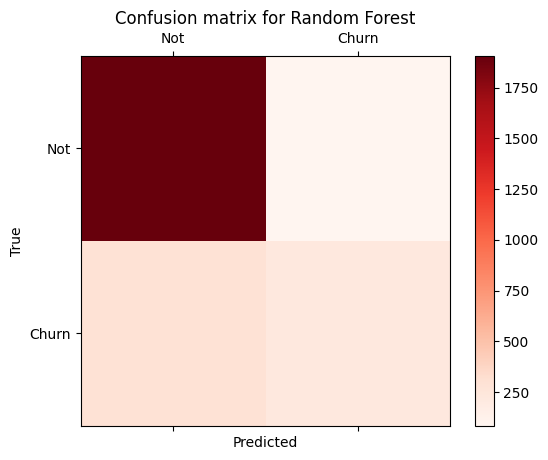

Logistic Regression
Accuracy is: 0.8112
precision is: 0.6010928961748634
recall is: 0.21611001964636542


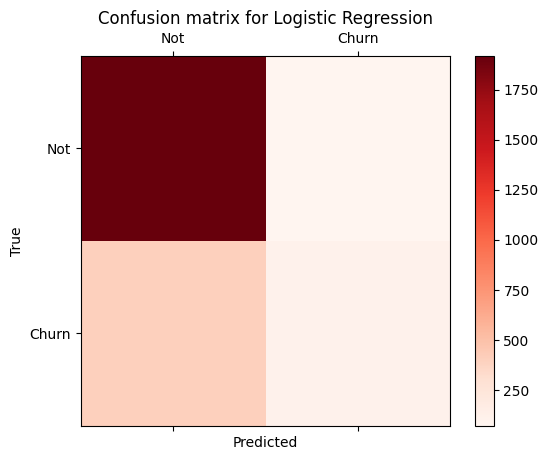

K nearest neighbor
Accuracy is: 0.8292
precision is: 0.6626984126984127
recall is: 0.3280943025540275


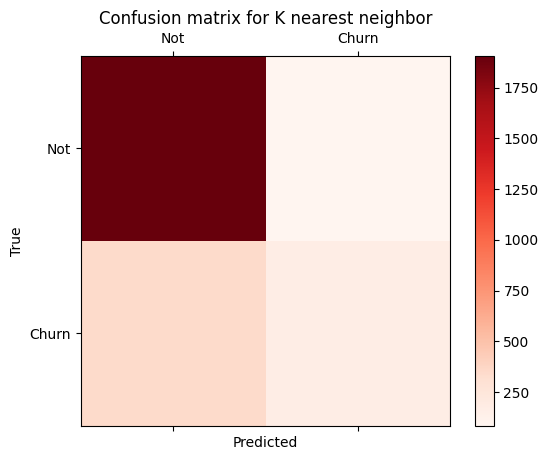

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

In [ ]:
confusion_matrix(y_test,best_RF_model.predict(X_test))

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function

#### Part 3.4.1: ROC of RF Model

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [ ]:
best_RF_model.predict_proba(X_test)

array([[0.25      , 0.75      ],
       [0.98333333, 0.01666667],
       [0.95      , 0.05      ],
       ...,
       [0.83333333, 0.16666667],
       [0.93333333, 0.06666667],
       [0.26666667, 0.73333333]])

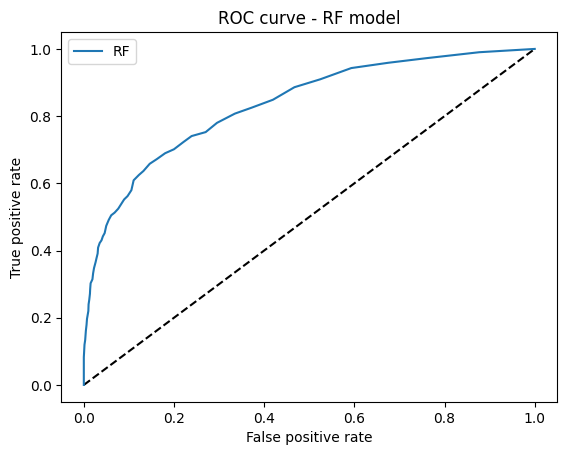

In [ ]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf, tpr_rf)

0.8340661661168776

#### Part 3.4.1: ROC of LR Model

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

In [ ]:
best_LR_model.predict_proba(X_test)

array([[0.88016926, 0.11983074],
       [0.96712928, 0.03287072],
       [0.95831343, 0.04168657],
       ...,
       [0.78504849, 0.21495151],
       [0.91427197, 0.08572803],
       [0.78954474, 0.21045526]])

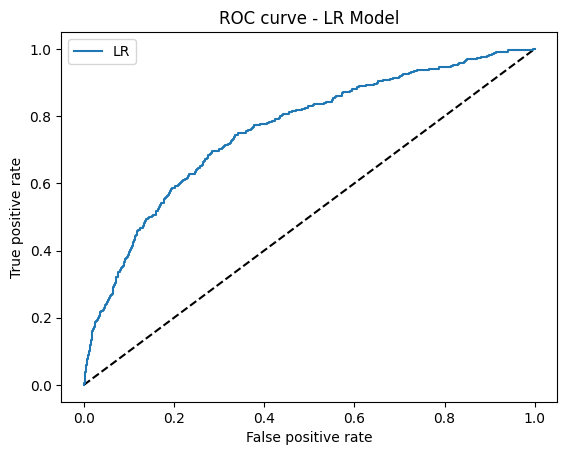

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.757365906895371

# Part 4: Feature Importance

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion

We created two highly correlated features to compare L1 vs L2 results. This shows that sometimes we don't necessarily need to do feature selection. Can use L1 or L2 to resolve multicollinearity problem without doing feature selection

In [ ]:
# Created two highly correlated features with multicollinearity to compare l1 vs l2
X_with_corr = X.copy()
X_with_corr['SalaryInRMB'] = X['EstimatedSalary'] * 6.91
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0,700320.7608
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1,777669.2278
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0,787267.1487
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0,648342.0133
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1,546471.1310


In [ ]:
# add L1 regularization to logistic regression
# one of the features is set to 0
# hence, L1 has feature selection capabilities
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.01, solver='liblinear') # lambda = 100
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.6469
IsActiveMember : -0.4191
Geography_Germany : 0.2719
Gender : 0.1802
Balance : 0.1133
NumOfProducts : -0.0029
SalaryInRMB : 0.0
Geography_Spain : 0.0
Geography_France : 0.0
EstimatedSalary : 0.0
HasCrCard : 0.0
Tenure : 0.0
CreditScore : 0.0


In [ ]:
# add L2 regularization to logistic regression
# both coefficients the same
# no FS, keeps both
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))


Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : 0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
EstimatedSalary : 0.0137
SalaryInRMB : 0.0137


Can we use parameter estimates as a way to do feature selection?
* statistically speaking, parameter estimates are not equivalent to feature importance
* from one perspective, parameter estimates do measure the amount they affect the response
* we can consider practical meaning of the parameters and determine based on experience

### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2404
EstimatedSalary : 0.147
CreditScore : 0.1436
Balance : 0.141
NumOfProducts : 0.1319
Tenure : 0.0813
IsActiveMember : 0.038
Geography_Germany : 0.0227
Gender : 0.0183
HasCrCard : 0.0178
Geography_France : 0.009
Geography_Spain : 0.0088
